# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
During the simulation, the Smartcab doesn't move at all during a trial. The position of the Smartcab seems to be randomly initialized.
The status says, that the Agent is not enforced to meet the deadline... So, the Smartcab does the smartest thing it can do and stays safe (don't move).
There are positive and negative rewards.
- *if the Smartcab idles on a green light, without incoming traffic, it gets a negative reward*
- *if the Smartcab idles on a green light, with oncoming traffic, it gets a positive reward*
- *if the Smartcab idles on a red light, it gets a positive reward*

The given rewards seem to differ in the magnitude. For example, if the Smartcab does something right, two times in a row, the second reward seems to be higher. Vicer versa, two failures in a row, the negative reward is higher.
The fontcolor changes with the type of reward
- *positive reward is green font color*
- *positive reward is yellow font color, for the special case idle on a green light with oncoming traffic*
- *negative reward is red font color*
Additionallyt we can assume, that if the deadline is enforced, there is going to be a reward for meeting the deadline requirements (positive) or failing (negative) it.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
#### agent.py
There are several Flags to set in order to adjust the Environment, driving agent, and when creating the simulation.
- the flag **num_dummies** adjust how many other cars take part in the simulation, I'd say, the more cars the more decision the Smartcab has to make and the more rewards it can get as well
- the flag **grid_size** changes the number of intersection, similar as before, more intersection means more decisions and rewards
- the flag **learning** enforces to  the driving agent to use Q-Learning if set to true

#### environment.py
the function act(object, agent, action) is called
- if there are four valid action defined: 'None', 'forward', 'left', 'right'

#### simulator.py
If I set the flag **display** in the **agent.py** for the simulation, the 'render_text()' function will be processed, where the 'render()' function won't. The 'render_text()' renders or displays data in the non-GUI window (terminal) and the 'render()' function in the GUI window where the roads and cars are drawn to give a visual feedback of the simulation.

#### planner.py
The conditional statement checks first, if the Smartcab is already at the final place. After that it checks if the Smartcab is heading to correct East or West direction (dx) and adjusts the direction if neccessary. After that it checks for the correct North or South (dy) and adjusts if neccessary. Therefor it considers East-West first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


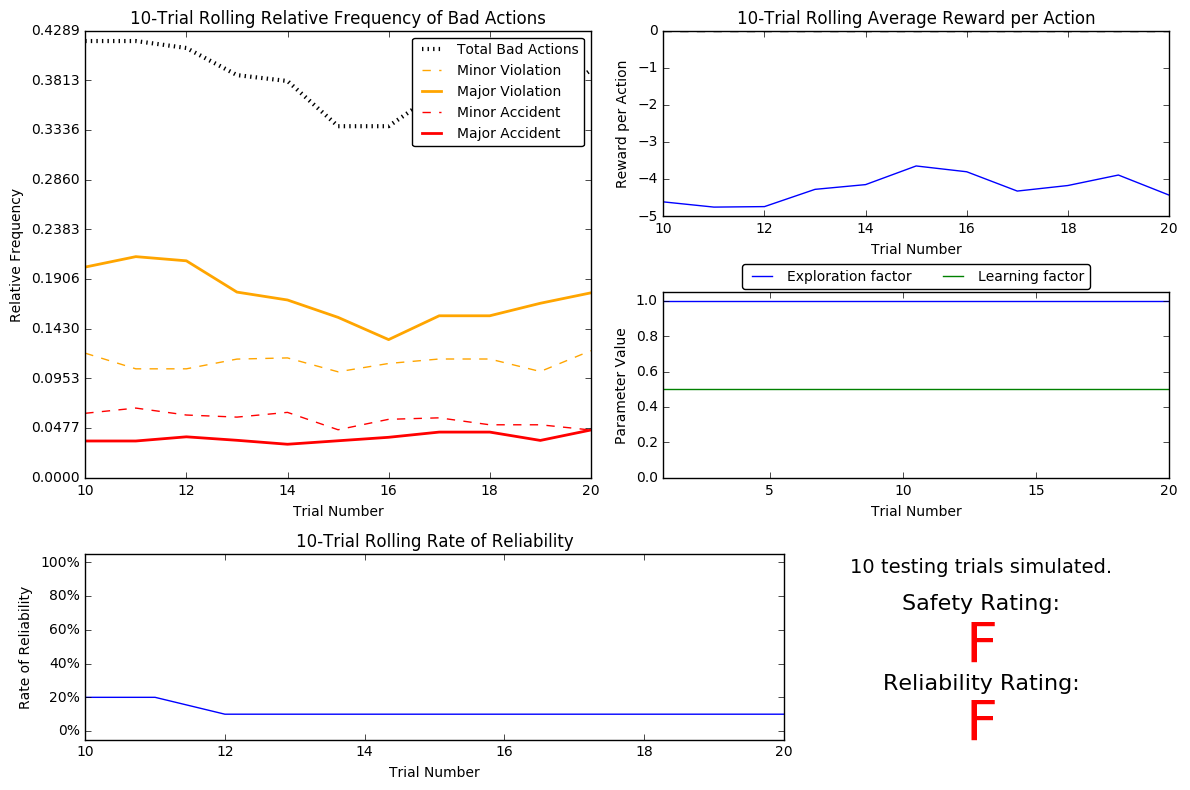

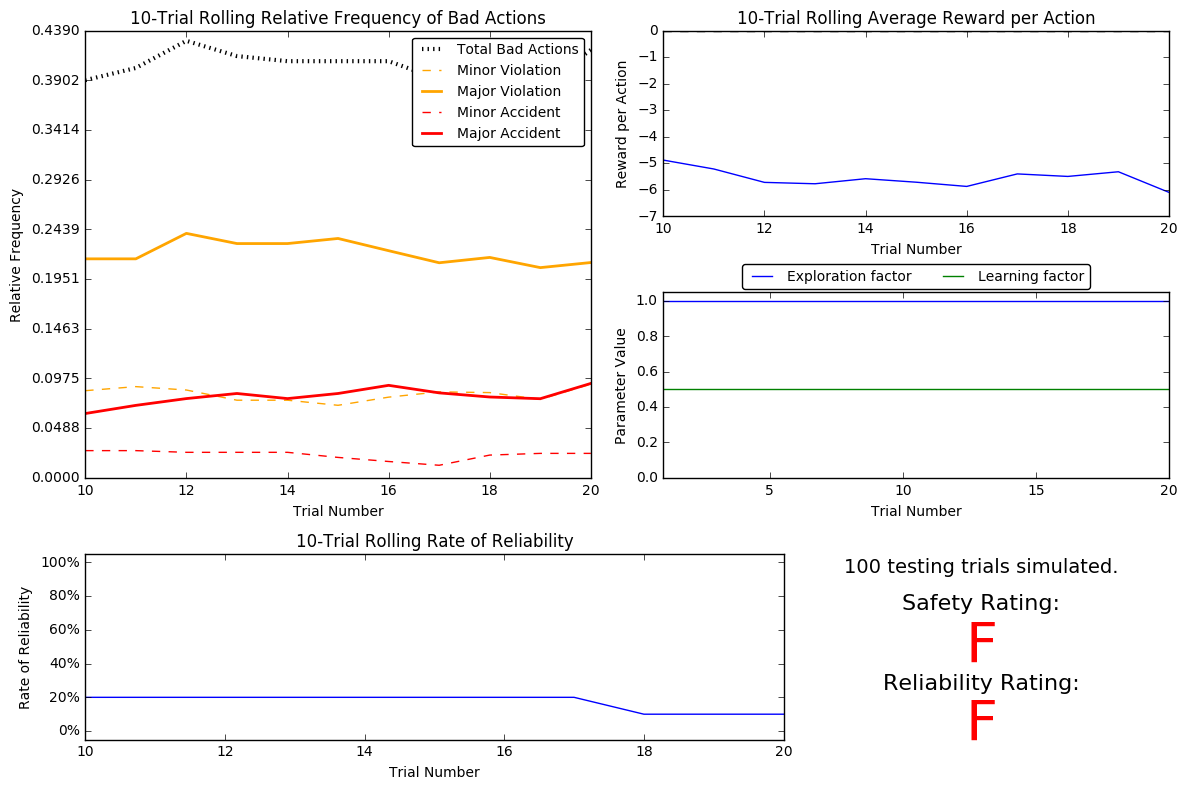

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning_10.csv')
vs.plot_trials('sim_no-learning_100.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
*Frequency of making bad decisions by the driving agent and cause accidents.*

Over the 10 testing trials, the driving agent makes approximately between 34% (trials 15,16) and 43% (trial 10) of the time bad decision. In 4% of its decision it caused major accidents and in 6% it caused minor accidents (in average through all the testing trials)

*Random driving and it's reliability.*

The graph shows in the beginning a 20% of reliability, which then goes down to 10% with trial number 12 and keeps that level until the last one. Depending how "reliability" is defined in that case, the rate of reliability makes complete sense, since the agent didn't reach the target in time in less than 60% of the time. If the agent were very very lucky it could get a better result. But given just a simple thought, that if in 1 of 4 choices, one would be correct in several steps to reach the target in a limited amount of time... the odds for that are very low. Never the less, the log file shows that it was indeed successful in 2 of 10 trials (still less than required for an E)

*Rewards for agents and penality*

The graph shows an average reward of about -4.6 in the beginning and climbs up to -3.8 in trial 15 and then declines to about -4.4 again in trial 20. Depending on what a heavy penality is, the agent never reached a positive net reward. But given deactivated learning and random actions, it's ok.

*Change of outcomes depending on number of trials.*

Given the fact of random actions and no learning, the outcomes can not change significantly. Even if it would change, it has to be an outlier or the random number generator is broken. But then again, who hasn't seen a 15 times red in a row on a Roulette table.

*Safety and Reliability of the car*

Given different definitions of safety and reliability in different Countries... the agent must not be considered anywhere safe or reliable in no Country (even in China...) Given it's random nature, it's much safer to let a pet drive the car (it couldn't drive, so per definition it's very safe). The agent makes wrong choices and causes accidents and violates the rules frequently (but no learning and random actions, it's ok)-not safe. In more than 60% of the time it does not reach its destination- not reliable

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
The task is to build an agent which is efficient and safe, given that all features are important to accomplish that goal.
In order to accomplish **efficiency/reliability** I'd say *'waypoints'* only is most appropriate for that. It tells the agent where to go he last one indicates whether or not the current strategy or way is the right one to be at the destination in time. If not, there might be another way or strategy. But for modeling it might be difficult to use the 'deadline', since there are too many possible states in order to make the agent learn. Therefore I would *not* choose the 'deadline' for modeling because it would blow up the state space too much ( similar with the date in the introduction)
For **safety** I'd choose the sensor data, which is the only way for the agent to get feedback from the environment. If there is no feedback, the agent can't know if it causes violations or accident with the current actions or why it get an negative reward.
So, I'd only omit the deadline feature, since it's not neccessary for the learning and would increases the state space.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

If the directions are the the three valid ones, the inputs are distinguished between the four given ones in order to buid a safe smartcab I'd the more data we can get the safer it can be...
But too safe means also slow and sometimes even don't move. Conditional rules (Red light for example, nothing matters in general, just wait) are not an option. I assume one lane for each direction at the crossing, so there ain't no problems if a car goes right and it crosses the traffic with the opposite side going left or from left going straight. Moreover, if the light is red I assume I can gently go right without get punished (although in germany you would without a green arrow, where in china no big deal...).
Taken that in account, we could exclude the 'right' input, since it won't matter. Also the left one wouldn't matter, since we have our one lane on a red light to go right (but a forum post emphasized, it all matters).
Therefore I define the state-space with:
- 3 valid actions
- 4 inputs (left, oncoming, light, right) with (4,4,4,2) possible states
That leaves us with 3x4x4x4x2 = 384 states.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

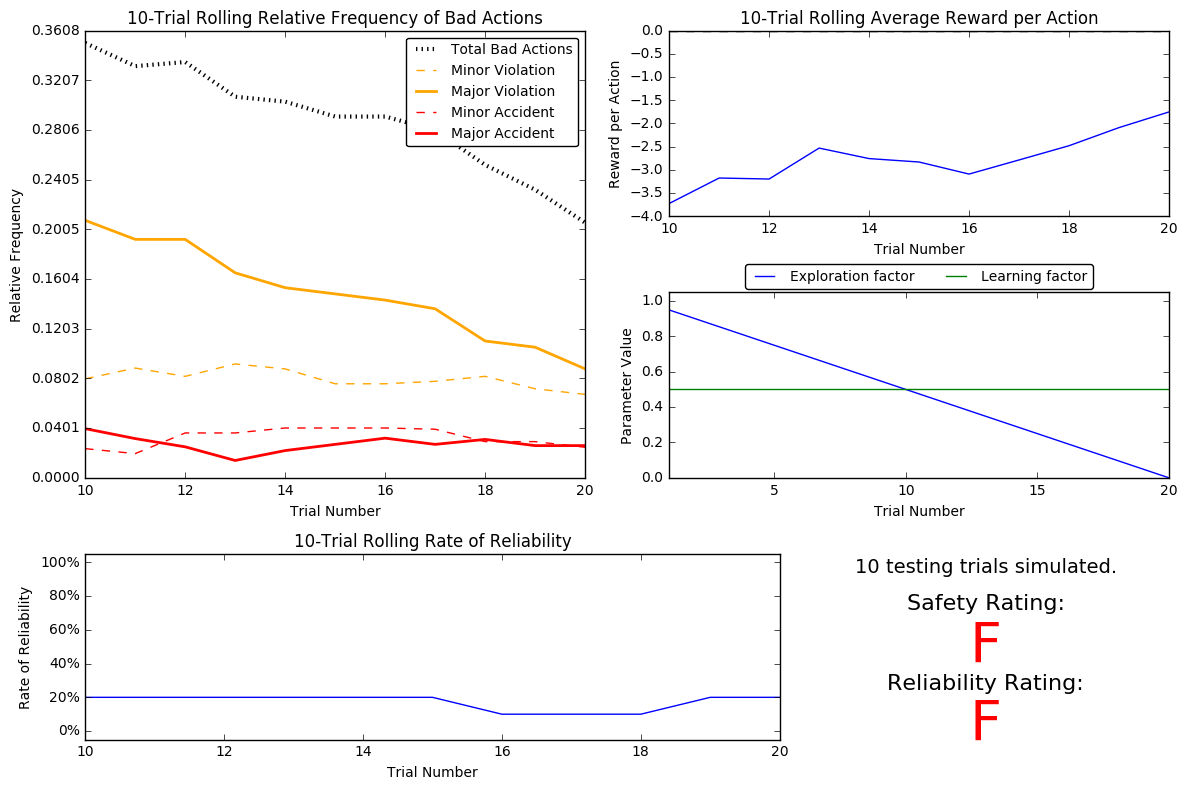

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

#### Similarities

The score is very similar to the basic driving agent. Additinally the rate of reliability is similar in that way, that it doesn't increase or decrease. Finally the learning rate alpha is steady as well.

#### Training trials
If I did implement the given decay function, the trails are set to about, 19. An given the tolerance of 0.05 it does make totally sense, because the decay is a linear function and starting from 1 id decays 0.05 each trial. It is not appropiate, given the number of possible states.

#### decay function
The given linear function is accurately represented.

#### Improvements over trials
Both indeed happened. Over time, the number of bad actions decreased and the average reward increase as well. This didn't change even when restarted. The general shape kept.

#### Safety/Reliability

It doesn't change much, although the reliability improved a little bit from 10% to about 20% with three trials at 10%.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

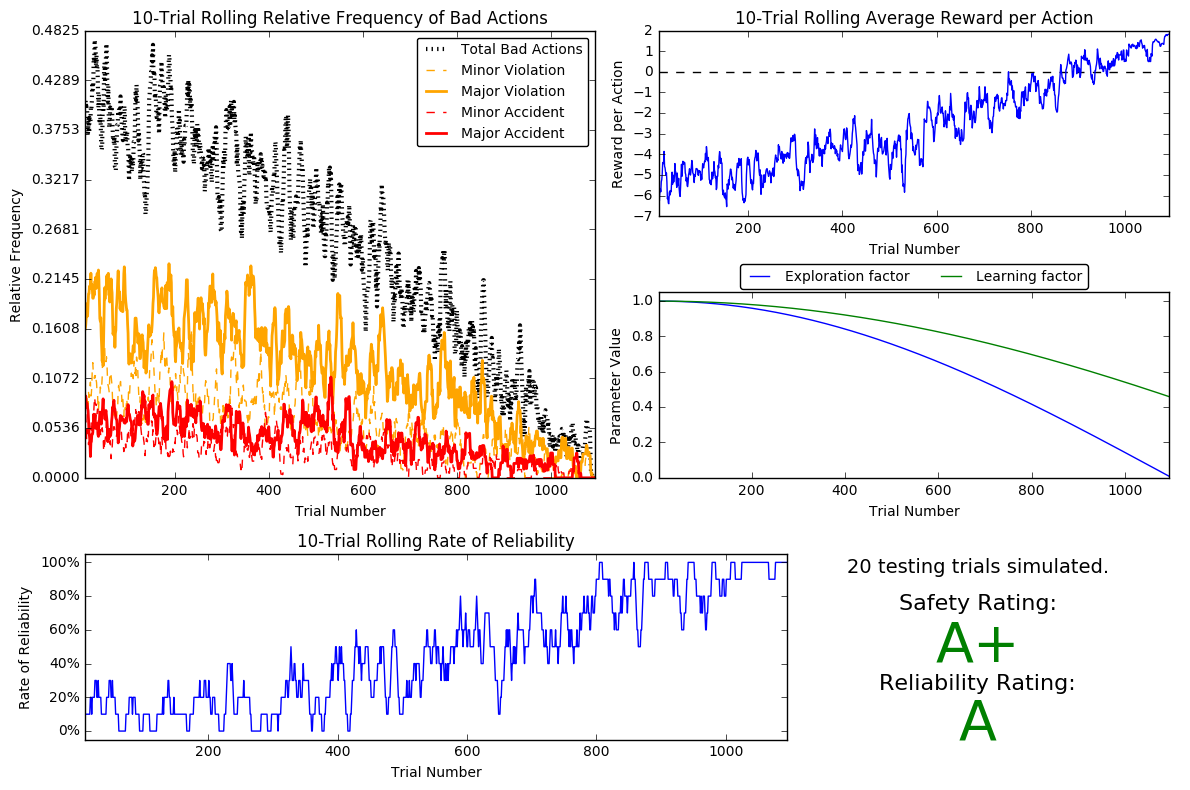

In [13]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
##### Decaying function#####
I tried all listed decaying functions and a linear function as well. Finally I chose the cosine function, because it gave the best results. It seems that if it decays too fast (like the first three functions) the safety score is very low and sometimes F.
##### Training trails#####
I tried between 20 and over 2000 training trails, the best results started when adjusted to about 1000 trials (although in less trails both scores sometimes come out A+). Therefore at about 800 trials the agent already shows good results.
##### Epsilon and Alpha#####
I chose a final epsilon tolerance of 0.01. The reason for the low tolerance is, that I like to have the agent in a more greedy state where it choses the learned states more often.
For alpha I chose a linear decaying function, where its decreasing from about 1 downto about 0.5 (that showed kind of random but goot reliability scores). After that I tried the cosine function with decaying to approximately to 0.5 when the epsilon is at 0.01. That gave good reliability scores with less/no randomness in the score. 
###### Improvements#####
Improvements showed in safety and reliability as well. Given more learning trials, the agent now knows most of the traffic rules compared to the default-Learner.
Given these improvements I'd definetly say the agents learned an appropriate policy. With the given score (safety A+ and reliability between A and A+) I am satisfied with the performance of the smartcab.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

In [9]:
import matplotlib.pyplot as plt
def plot_state_scores( find_state ):
    f = open("logs/sim_improved-learning.txt","r")

    stext = f.read()
    where = stext.find(find_state)
    f.seek(where)
    f.readline()
    sforward = f.readline()
    sright = f.readline()
    snone = f.readline()
    sleft = f.readline()

    caption = []
    values = []

    caption.append(sforward.split(":")[0])
    caption.append(sright.split(":")[0])
    caption.append(snone.split(":")[0])
    caption.append(sleft.split(":")[0])

    values.append(sforward.split(":")[1])
    values.append(sright.split(":")[1])
    values.append(snone.split(":")[1])
    values.append(sleft.split(":")[1])

    plt.figure()
    plt.bar(range(4),values)
    plt.xticks(range(4),caption)
    plt.title(find_state)

**Answer:** 
**State:** ('waypoint', 'right', 'light', 'red', 'oncoming', None, 'left', 'right', 'right', None)
If the agent wants to go right on a red light, but the rest of the traffic wouldn't cause any cross paths the optimal policy would be to go right, or first wait and then go right. In the chart below, it's good to see that at least the wrong actions have a high negative reward (forward, left) and the optimal policy actually to go right is topped by the safe choice to stop/none.

**State:** ('waypoint', 'left', 'light', 'green', 'oncoming', 'forward', 'left', None, 'right', None)
In this case, the optimal policy would be to wait until the oncoming traffic goes left/none/right. In the action I'd say go forward and wait.
In the chart below for that state, it's interesting to see that the agent chose to go right over forward and the none together with left actually got a negative reward. Taken a constraint where the agent has to move and a none moving on a green light gets punished the optimal action would be to go forward.

**State:** ('waypoint', 'left', 'light', 'green', 'oncoming', None, 'left', None, 'right', None)
This state could be the following state of the previouse one. Now, green light and no cross traffic at all. So, the optimal policy is to go left.
The data below fully agrees with that policy followed by some "safe" actions to not cross any possible traffic.

**State:** ('waypoint', 'forward', 'light', 'red', 'oncoming', None, 'left', None, 'right', None)
This state might be a little tricky for the agent, no traffic and a red light (here in china... even we foreigners would just go straight). The optmal policy is to wait/none.
The agent choses to wait followed to go right. That shows, that even the waypoint is to go forward and the agent goes right, it doesn't get punished with a negative reward...

From the logs/sim_improved-learning.txt


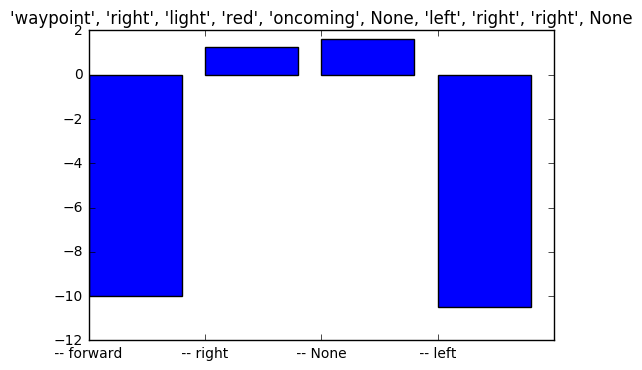

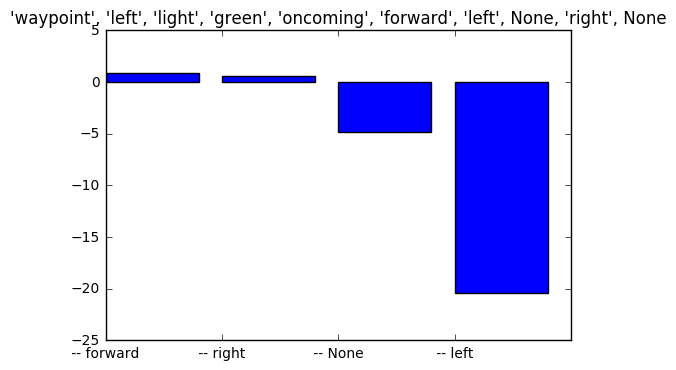

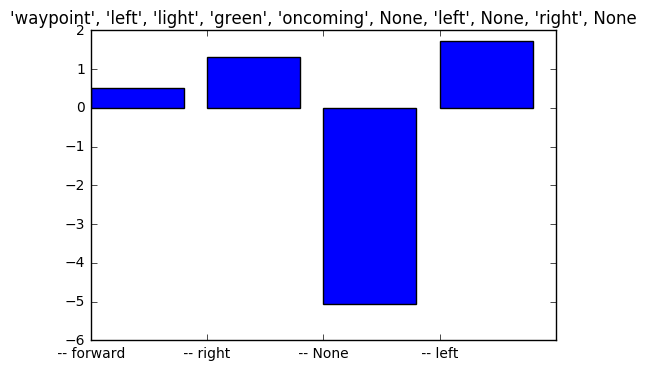

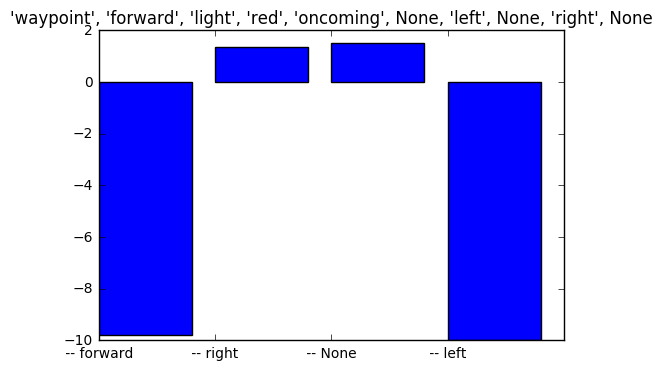

In [14]:
print "From the logs/sim_improved-learning.txt" 

plot_state_scores("'waypoint', 'right', 'light', 'red', 'oncoming', None, 'left', 'right', 'right', None")
plot_state_scores("'waypoint', 'left', 'light', 'green', 'oncoming', 'forward', 'left', None, 'right', None")
plot_state_scores("'waypoint', 'left', 'light', 'green', 'oncoming', None, 'left', None, 'right', None")
plot_state_scores("'waypoint', 'forward', 'light', 'red', 'oncoming', None, 'left', None, 'right', None")


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.